In [11]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import time
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 8/zinc_prices_IMF.csv")

In [13]:
data.head()

,Date,Price
0,1-Jan-80,773.82
1,1-Feb-80,868.62
2,1-Mar-80,740.75
3,1-Apr-80,707.68
4,1-May-80,701.07


In [14]:
data["Date"] = data["Date"].apply(lambda x: time.strptime(x, "%d-%b-%y"))
data["Date"] = data["Date"].apply(lambda x: dt(int(x[0]), int(x[1]),int(x[2])))
data = data.set_index("Date")
data.head()

,Price
Date,
1980-01-01,773.82
1980-02-01,868.62
1980-03-01,740.75
1980-04-01,707.68
1980-05-01,701.07


In [15]:
ts = data["Price"]

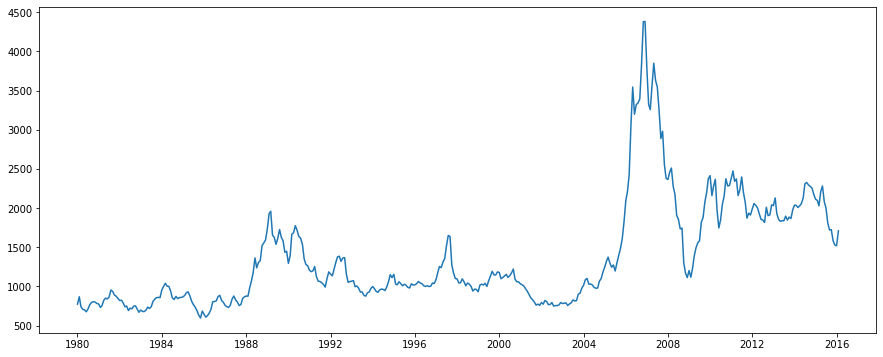

In [16]:
plt.plot(ts)

In [17]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52, center=False).mean()
    rolstd = timeseries.rolling(window=52, center=False).std()
    
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling std")
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard deviation")
    plt.show(block=False)
    
    print("Results of Dickey-Fuller test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
    print(dfoutput)

In [18]:
ts_log = np.log(ts)

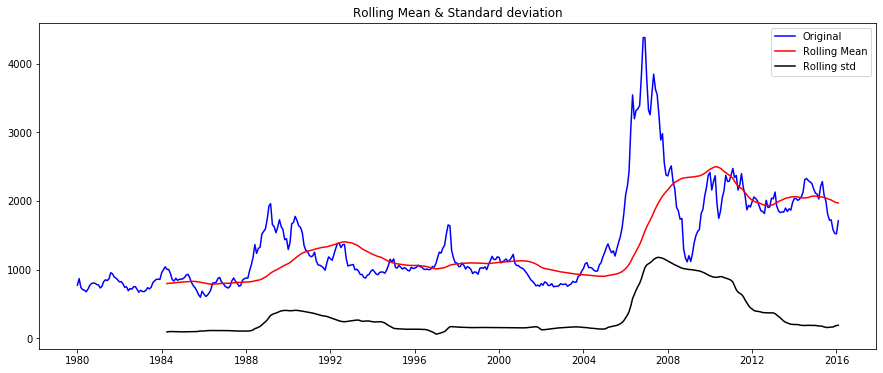

Results of Dickey-Fuller test:
Test Statistic                  -3.139601
p-value                          0.023758
#Lags Used                       7.000000
Number of Observations Used    426.000000
Critical Value (1%)             -3.445794
Critical Value (5%)             -2.868349
Critical Value (10%)            -2.570397
dtype: float64


In [19]:
test_stationarity(data["Price"])

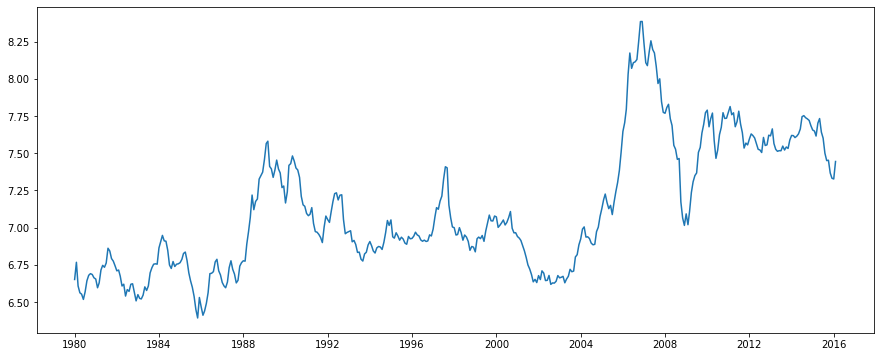

In [20]:
plt.plot(ts_log)

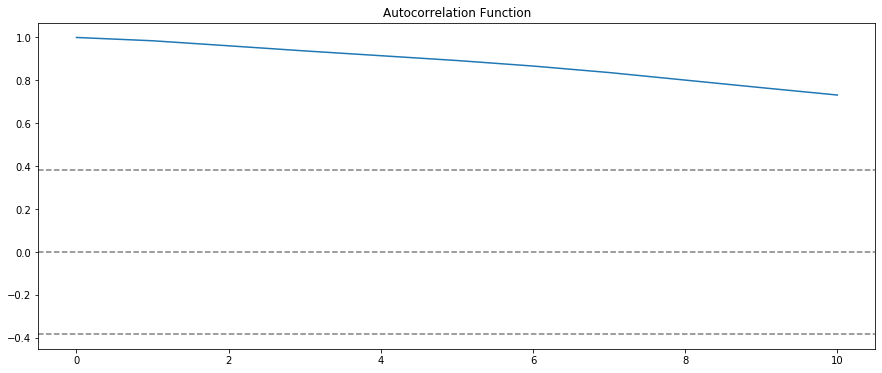

In [25]:
plt.plot(np.arange(0,11),acf(ts, nlags=10))
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts)), linestyle="--", color="gray")
plt.axhline(y=7.96/np.sqrt(len(ts)), linestyle="--", color="gray")
plt.title("Autocorrelation Function")
plt.show()

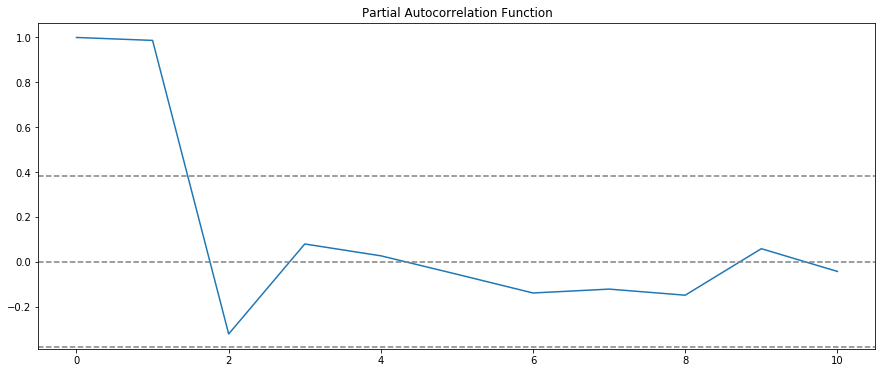

In [26]:
plt.plot(np.arange(0,11),pacf(ts, nlags=10))
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts)), linestyle="--", color="gray")
plt.axhline(y=7.96/np.sqrt(len(ts)), linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function")
plt.show()

Text(0.5, 1.0, 'RSS: nan')

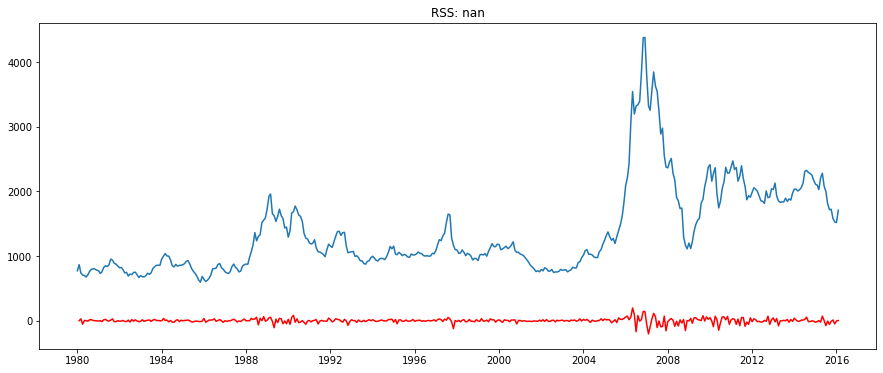

In [29]:
model = ARIMA(ts, order=(2,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues[1:] - ts)**2))

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
1980-02-01     2.404472
1980-03-01    31.006142
1980-04-01   -52.469343
1980-05-01     4.497657
1980-06-01     3.196152
dtype: float64

In [31]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1980-02-01     2.404472
1980-03-01    33.410615
1980-04-01   -19.058728
1980-05-01   -14.561071
1980-06-01   -11.364919
dtype: float64

In [32]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
1980-01-01     6.651339
1980-02-01     9.055812
1980-03-01    40.061954
1980-04-01   -12.407389
1980-05-01    -7.909732
dtype: float64